<a href="https://colab.research.google.com/github/Pratham-Rajeev-Agrawal/ML-Projects/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.shape

(614, 13)

In [ ]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
dataset.value_counts('Loan_Status')

,count
Loan_Status,
Y,422
N,192


In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.shape

(480, 13)

In [ ]:
dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace = True)

<ipython-input-15-f4c9367a9850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace = True)


In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
dataset = dataset.replace(to_replace = '3+', value = 4)

In [ ]:
dataset.value_counts('Dependents')

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Property_Area', ylabel='count'>

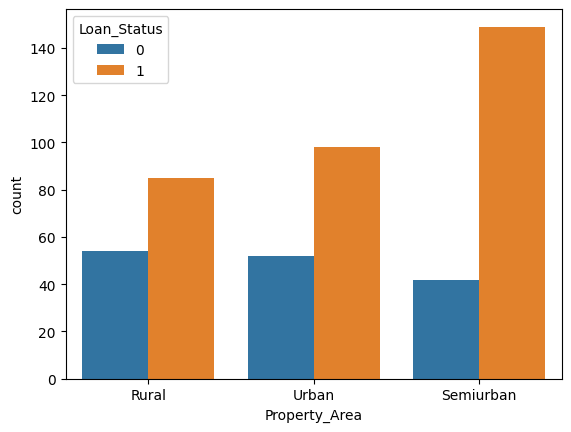

In [ ]:
sns.countplot(x='Property_Area', hue = 'Loan_Status', data = dataset)

<Axes: xlabel='Gender', ylabel='count'>

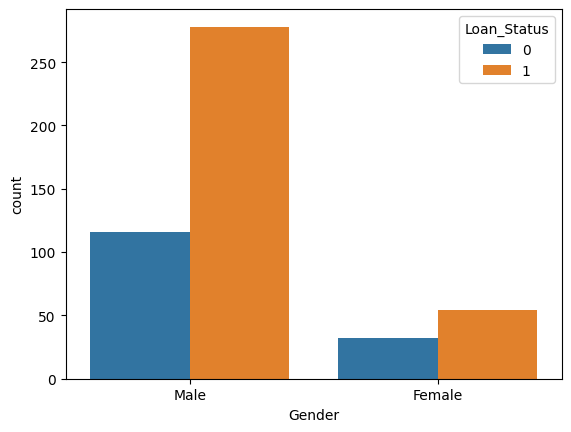

In [ ]:
sns.countplot(x='Gender', hue = 'Loan_Status', data = dataset)

In [ ]:
dataset.replace({'Married':{'No':0, 'Yes':1}, 'Gender': {'Male':1, "Female":0}, 'Education':{'Graduate':1, 'Not Graduate':0}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace = True)

<ipython-input-25-397a8ba737db>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Married':{'No':0, 'Yes':1}, 'Gender': {'Male':1, "Female":0}, 'Education':{'Graduate':1, 'Not Graduate':0}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace = True)


In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
x = dataset.drop(columns = ['Loan_Status', 'Loan_ID'], axis = 1)
y = dataset['Loan_Status']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x = scaler.fit_transform(x)

In [ ]:
print(x)

[[ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.31886834]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
   1.25977445]
 [-2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
  -0.02954695]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 2, test_size = 0.1)

In [ ]:
print(x_train.shape, x_test.shape)

(432, 11) (48, 11)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
prediction = classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(prediction, y_test)
print(accuracy)

0.8333333333333334
